In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
engine = create_engine(f'postgresql://postgres:postgres@/employee_sql')
connection = engine.connect()

In [3]:
salaries_df = pd.read_sql('SELECT * FROM "Salaries"', connection)
salaries_df.head()

,Employee_Number,Salary,Start_Date,End_Date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
title_df = pd.read_sql('SELECT * FROM "Titles"', connection)
title_df.head()

,Employee_Number,Title,Start_Date,End_Date
0,10001,Senior Engineer,1986-06-26,9999-01-01 00:00:00
1,10002,Staff,1996-08-03,9999-01-01 00:00:00
2,10003,Senior Engineer,1995-12-03,9999-01-01 00:00:00
3,10004,Engineer,1986-12-01,1995-12-01 00:00:00
4,10004,Senior Engineer,1995-12-01,9999-01-01 00:00:00


In [5]:
combined_df = pd.merge(title_df, salaries_df, on="Employee_Number", how='right')
combined_df.head()

,Employee_Number,Title,Start_Date_x,End_Date_x,Salary,Start_Date_y,End_Date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01 00:00:00,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01 00:00:00,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01 00:00:00,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01 00:00:00,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01 00:00:00,40054,1986-12-01,1987-12-01


In [6]:
classified_df = combined_df[["Title", "Salary"]]
classified_df.head()

,Title,Salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054


In [7]:
average_salary = classified_df.groupby("Title")["Salary"].mean().round(2)
average_salary

Title
Assistant Engineer    48493.20
Engineer              48539.78
Manager               51531.04
Senior Engineer       48506.75
Senior Staff          58503.29
Staff                 58465.27
Technique Leader      48580.51
Name: Salary, dtype: float64

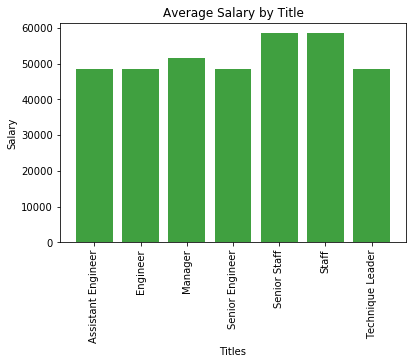

In [8]:
x_axis = ["Assistant Engineer", "Engineer", "Manager", "Senior Engineer", "Senior Staff", "Staff", "Technique Leader"]
plt.bar(x_axis, average_salary, color='green', alpha=0.75)
plt.xlabel("Titles")
plt.ylabel("Salary")
plt.title("Average Salary by Title")
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.savefig("../Images/avg_salary_chart")